In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/pub.csv')
df.head()

,Duree,Age,Revenu_moyen,Duree_internet,Titre,Ville,Genre,Pays,Heure_clique,Clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Duree           1000 non-null   float64
 1   Age             1000 non-null   int64  
 2   Revenu_moyen    1000 non-null   float64
 3   Duree_internet  1000 non-null   float64
 4   Titre           1000 non-null   object 
 5   Ville           1000 non-null   object 
 6   Genre           1000 non-null   int64  
 7   Pays            1000 non-null   object 
 8   Heure_clique    1000 non-null   object 
 9   Clique          1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [12]:
df.isnull().sum() #no null values in the dataset

Duree             0
Age               0
Revenu_moyen      0
Duree_internet    0
Titre             0
Ville             0
Genre             0
Pays              0
Heure_clique      0
Clique            0
dtype: int64

In [13]:
df.duplicated().sum() #no duplicated values in the dataset

0

In [14]:
df.nunique() #no unique values in the dataset

Duree              900
Age                 43
Revenu_moyen      1000
Duree_internet     966
Titre             1000
Ville              969
Genre                2
Pays               237
Heure_clique      1000
Clique               2
dtype: int64

### **EDA**

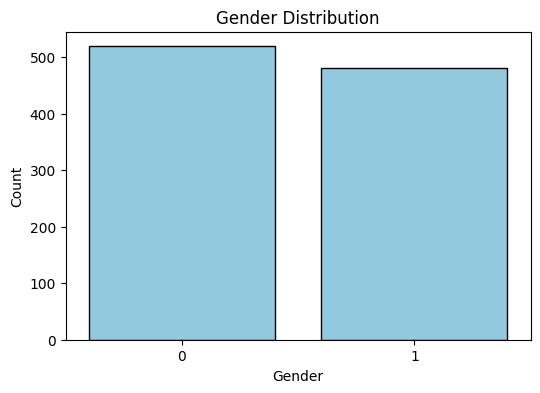

In [38]:
#number of observation in the gender column
plt.figure(figsize=(6,4))
sns.countplot(x='Genre', data=df, edgecolor='black', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

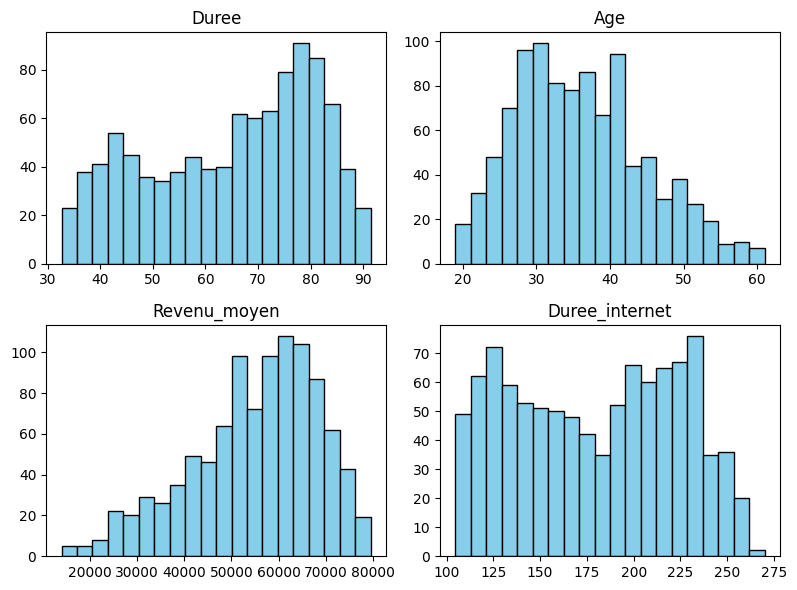

In [48]:
# histograms to view the distribution of numerical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(['Genre', 'Clique'], axis = 1)
numerical_features.hist(figsize=(8, 6), layout=(2, 2), bins=20, grid=False, edgecolor='black', color='skyblue')
plt.tight_layout()
plt.show()

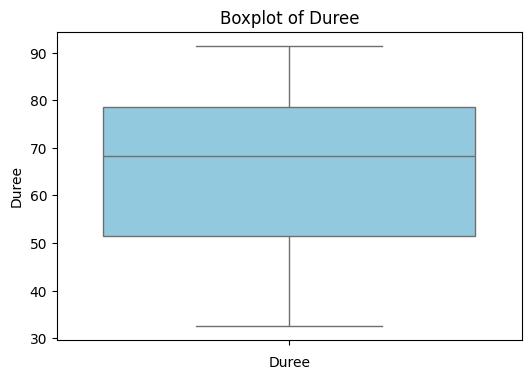

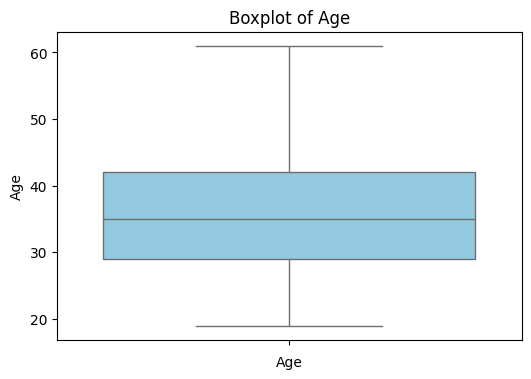

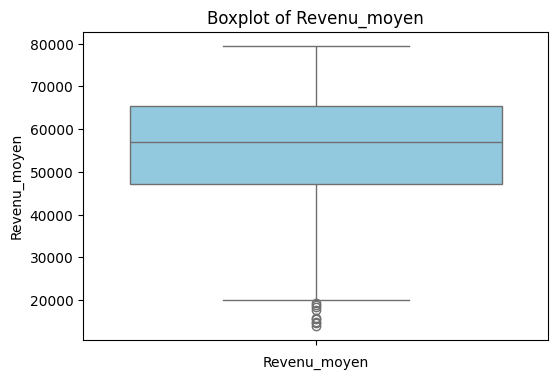

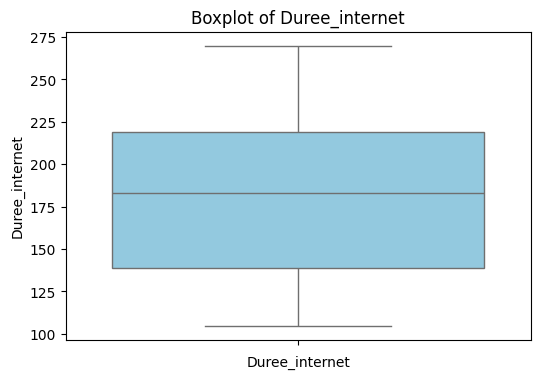

In [75]:
# creating boxplot
for column in numerical_features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column, data=numerical_features, color='skyblue')
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()

### **STUDYING DEPENDENCIES**

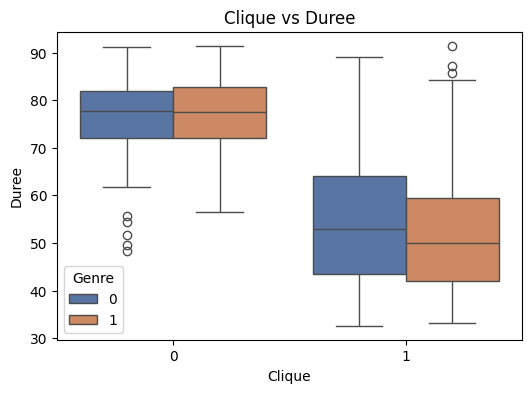

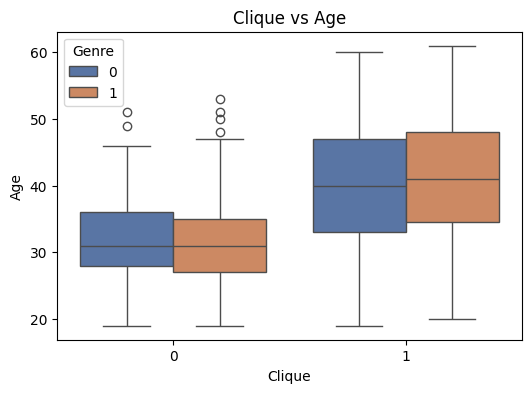

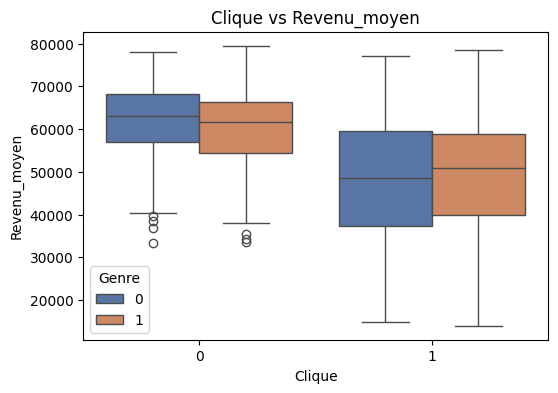

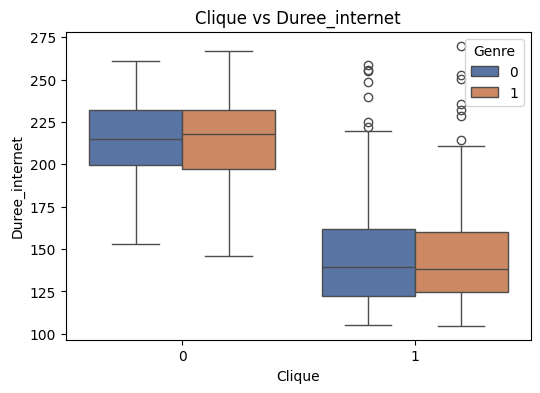

In [76]:
for column in numerical_features.columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x='Clique', y=column, data=df, color='skyblue', hue='Genre', palette='deep')
  plt.xlabel('Clique')
  plt.ylabel(column)
  plt.title(f'Clique vs {column}')
  plt.show()

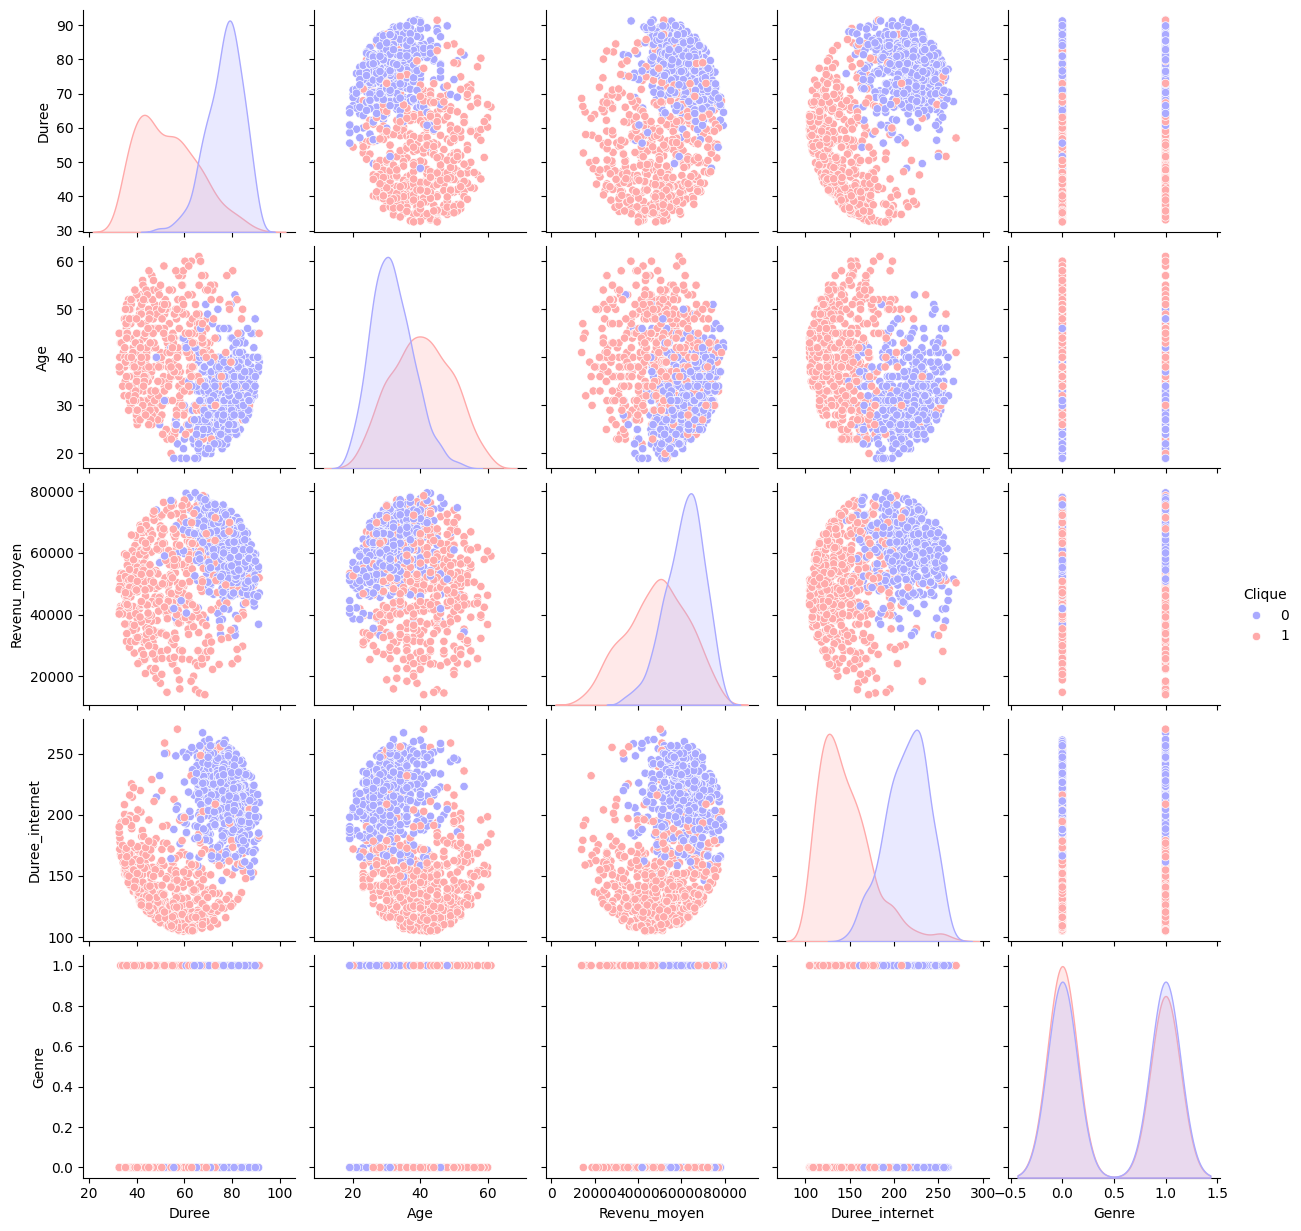

In [90]:
sns.pairplot(df, hue='Clique', palette='bwr')
plt.show()

In [108]:
x = df.drop(['Clique','Titre', 'Ville', 'Heure_clique', 'Pays'], axis=1)
y = df['Clique']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [111]:
y_pred = lr.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (global performance of the model):", accuracy)

Confusion Matrix:
 [[ 86   3]
 [  5 106]]
Accuracy (global performance of the model): 0.96


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.97      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [118]:
#predicting a specific ovservation : woman aged 30 earning 100000 and using the website for 60 minutes a day, and internet for 90 minutes a day
lr.predict([[60,30,100000,90,0]])

array([0])

In [ ]:
# for this specific case , the algorithm predicts that she won't click on the add